In [2]:
from ml import *
# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import imblearn

In [7]:
y = [78.29,198.56,462.3122737408,874.8,1959.88,5425.9719469547]
x = [1,2,3,5,10,20]


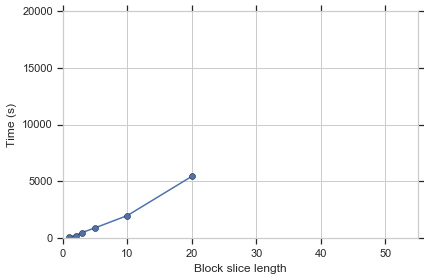

In [8]:
plt.plot(x, y, '-o')
plt.axis([ 0, 55,0, 20000])
plt.ylabel('Time (s)')
plt.xlabel('Block slice length')
plt.tight_layout()
plt.savefig('time.png') 

In [14]:
label_df = pd.DataFrame()
for i in range(400000,400510,10):
#for i in range(250000,250500,10):    #250000,250500,10
    x = pd.read_pickle('./data_10_new/user_df_labelled_{}.pickle'.format(i))
    label_df = label_df.append(x, sort=True)
#label_df = pd.read_pickle("./user_df_10.pickle")

label_df = label_df[label_df.category != 'mixed']

In [16]:
Y = label_df.category
X = label_df.drop(columns = ["category"])
X, X_test, Y, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y)

In [ ]:
X['category'] = Y
label_df = X
x1 = label_df.loc[label_df['category']=='exchanges']
x2 = label_df.loc[label_df['category']=='gambling']
x3 = label_df.loc[label_df['category']=='pool']
x4 = label_df.loc[label_df['category']=='mixer']

def downsample(big_class, small_class):
    indices = np.arange(big_class.shape[0])
    random_indices = np.random.choice(indices, size = small_class.shape[0], replace=True)
    downsampled_class = big_class.iloc[random_indices] # choose random staying customers
    return downsampled_class

x1 = downsample(x1,x2)
# x1 = downsample(x1,x4)
# x2 = downsample(x2,x4)
# x3 = downsample(x3,x4)

label_df =  pd.concat([pd.concat([pd.concat([x1, x2]),x3]),x4]) 
Y = label_df.category
X = label_df.drop(columns = ["category"])

In [15]:
label_df = label_df.drop(columns = [
       'num_receiving_tx_b',  'num_sending_tx_b', 
       'num_tx_a', 'num_tx_b', 'total_rec_a', 'total_rec_b',
       'total_rec_t',  'total_sent_a', 'total_sent_b',
       'total_sent_t', 'unique_rec_adr_b',
       'unique_rec_b', 'unique_rec_user_b',
       'unique_sent_adr_b', 'unique_sent_b',
       'unique_sent_user_b'])

In [ ]:
Y = label_df.category
X = label_df.drop(columns = ["category"])

## Visualise Correlation

In [ ]:
data_correlation = label_df.corr(method='spearman')
print("correlation: ")
data_correlation.style.format("{:.2}").background_gradient(cmap=plt.cm.Greens, axis=1)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_correlation = data_correlation[(abs(data_correlation) > 0.8)].fillna(0)
# Compute the correlation matrix
corr = data_correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

fig = sns_plot.get_figure()
fig.tight_layout()
fig.savefig('correlation matrix.png',bbox_inches = 'tight') 


## Visualize class imbalance

In [ ]:
import matplotlib.ticker as ticker

def class_hist(df):
    x = list(df.category.value_counts().to_frame().index)
    cats = []
    
    for i in x:
        if i == 'mixer' or i == 'pool':
            cats.append(np.sum(df["category"] == i)+1000)
        else:
            cats.append(np.sum(df["category"] == i))
    fig, ax = plt.subplots()
    print(cats)
    plt.bar(range(0,len(cats)), cats)
    ax.set_xticks(range(0,len(cats)))
    for p in (ax.patches):
        ax.annotate(str(p.get_height()), (p.get_x()+0.34, p.get_height() +100), fontsize=10)


    ax.set_xticklabels(x)


    # Hide major tick labels
    ax.xaxis.set_major_formatter(ticker.NullFormatter())

    # Customize minor tick labels
    ax.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5]))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter(x))
    
    ax.set_ylabel('Number of users')
    ax.set_title('Distribution of classes')
    plt.tight_layout()
    plt.savefig('dist_.png', bbox_inches = 'tight')


In [ ]:
x = class_hist(label_df)


## Downsampling

In [ ]:
x1 = label_df.loc[label_df['category']=='exchanges']
x2 = label_df.loc[label_df['category']=='gambling']
x3 = label_df.loc[label_df['category']=='pool']
x4 = label_df.loc[label_df['category']=='mixer']
def downsample(big_class, small_class):
    indices = np.arange(big_class.shape[0])
    random_indices = np.random.choice(indices, size = small_class.shape[0], replace=True)
    downsampled_class = big_class.iloc[random_indices] # choose random staying customers
    return downsampled_class

x1 = downsample(x1,x2)

label_df =  pd.concat([pd.concat([pd.concat([x1, x2]),x3]),x4]) 



In [ ]:
Y = label_df.category
X = label_df.drop(columns = ["category"])
X, X_test, Y, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)

In [ ]:
#Keeping time element
# X_1 = df[0:35000]
# X_2 = df[35000:40000]
# y_train = X_1.category
# y_test = X_2.category
# X_train = X_1.drop(columns=['category'])
# X_test = X_2.drop(columns=['category'])

## Decision Tree

In [ ]:
def plot_confusion_matrix(y_true, y_pred, filename):
    plt.figure()
    labels = ['exchanges', 'gambling', 'mixer', 'pool']
    mat = confusion_matrix(y_true, y_pred, labels)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
    plt.ylabel('true label'),
    plt.xlabel('predicted label')
    plt.savefig(filename+".pdf")
    plt.figure()
    mat_normalized = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(mat_normalized, fmt="f", square=True, annot=True, cmap="YlGnBu", cbar=True)
    plt.ylabel('true label'),
    plt.xlabel('predicted label')
    print("confusion matrix normalized: ")
    plt.tight_layout()
    plt.savefig(filename+"_normalized.pdf")

In [ ]:
dec_tree_classifier, y_pred = get_best_dec_tree(X_train=X_train, y_train=y_train,
                                       X_test=X_test, y_test=y_test)

#sum(y_pred == y_test) / len(y_test)
# import pickle
# # now you can save it to a file
# with open('dt_gambling.pickle', 'wb') as f:
#     pickle.dump(dec_tree_classifier, f)
    
scores(y_test, y_pred)
print("saving confusion matrix for decision tree...")
plot_confusion_matrix(y_test, y_pred, "decision_tree_downsampled_conf_matrix")

In [ ]:
##test on unseen data
print(Counter(y_val))
y_val_pred = dec_tree_classifier.predict(X_val)
scores(y_val, y_val_pred)
plot_confusion_matrix(y_val, y_val_pred, "decision_tree_downsampled_conf_matrix")

In [ ]:
from collections import Counter
Counter(Y)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred,
                          normalize=True,
                          title='Confusion matrix',
                          cmap="YlGnBu"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    classes = ['exchanges', 'gambling', 'mixer', 'pool']
    cm = confusion_matrix(y_true, y_pred, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##Cross Validation + Grid Search
dec_tree = tree.DecisionTreeClassifier(random_state=42, class_weight='balanced')
param_grid = dict(max_depth=list(range(1, 40)))

best_params = get_best_estimator_params(dec_tree, param_grid, X,Y)

dec_tree = tree.DecisionTreeClassifier(max_depth = best_params['max_depth'], random_state=42,  class_weight="balanced")
dec_tree.fit(X, Y)

y_test_pred = dec_tree.predict(X_test)

scores(Y_test, y_test_pred)
plot_confusion_matrix(Y_test, y_test_pred, "decision_tree_downsampled_conf_matrix")

In [ ]:
plot_confusion_matrix(Y_test, y_test_pred)

In [ ]:
best_params['max_depth']

In [ ]:
y_train_pred =  dec_tree.predict(X)
scores(Y, y_train_pred)
plot_confusion_matrix(Y, y_train_pred, "dt_down_train")

In [ ]:
feature_plot(list(X.columns),dec_tree.feature_importances_)

## Visualize Decision Tree upto a few depth layers

save decision tree with few depth layers for visualization: 
0.7162522202486679
confusion matrix normalized: 
Accuracy: 0.7162522202486679
Recall: [0.68559774 0.77787162 0.82       0.95180723]
Precision: [0.92349958 0.66546243 0.06721311 0.54861111]
f1 score: [0.786962   0.71728972 0.12424242 0.69603524]


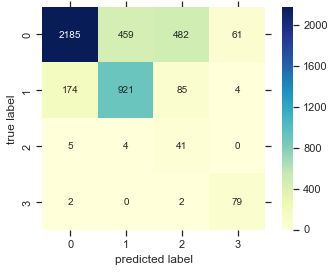

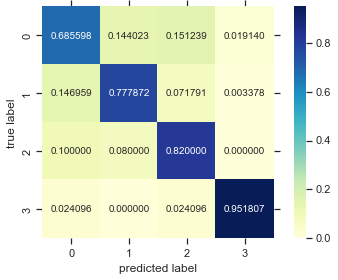

In [20]:
print("save decision tree with few depth layers for visualization: ")
dec_tree = tree.DecisionTreeClassifier(max_depth = 5, random_state=42, class_weight="balanced")
dec_tree = dec_tree.fit(X, Y)
y_pred = dec_tree.predict(X_test)
print(accuracy_score(Y_test, y_pred))
plot_dec_tree(dec_tree, feature_names=X.columns, filename="Decision Tree3")
plot_confusion_matrix(Y_test, y_pred, "decision_tree_downsampled_conf_matrix")
scores(Y_test, y_pred)

## Random Forest

In [ ]:
rf_classifier, y_pred = get_best_random_forest(X_train=X_train, y_train=y_train,
                                       X_test=X_test, y_test=y_test)

In [ ]:
print("saving confusion matrix ...")
plot_confusion_matrix(y_test, y_pred, "random_forest_conf_mat.pdf")

In [ ]:
##test on unseen data
print(Counter(y_val))
y_val_pred = rf_classifier.predict(X_val)
scores(y_val, y_val_pred)
plot_confusion_matrix(y_val, y_val_pred, "decision_tree_downsampled_conf_matrix")

In [ ]:
## Cross Val + Grid Search

rf = RandomForestClassifier(random_state=42, class_weight="balanced")
param_grid = dict(max_depth=list(range(1, 40)))

best_params = get_best_estimator_params(rf, param_grid, X,Y)

rf = RandomForestClassifier(max_depth = best_params['max_depth'], random_state=42,  class_weight="balanced")
rf.fit(X, Y)

y_val_pred = rf.predict(X_test)

scores(Y_test, y_val_pred)
plot_confusion_matrix(Y_test, y_val_pred, "Random Forest CM")

In [ ]:
best_params['max_depth']

In [ ]:
y_train_pred =  rf.predict(X)
scores(Y, y_train_pred)
plot_confusion_matrix(Y, y_train_pred, "decision_tree_downsampled_conf_matrix")

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X, Y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(list(X.columns), rotation=45, ha='right', fontsize=12)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect
trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=50)
X_trans = trans.fit_transform(X, Y)
print("We started with {0} features but retained only {1} of them!".format(len(X.columns), X_trans.shape[1]))

In [ ]:
fig = feature_plot(list(X.columns),rf.feature_importances_)
plt.tight_layout()
plt.savefig('rf_fi.png')

In [ ]:
plt

## Normalise Data

In [ ]:
def pca_and_plot(X_train, y_train):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_train)
    y_df = y_train.to_frame()
    y_df = y_df.reset_index()
    y_df = y_df.drop(columns=['user'])
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, y_df], axis=1)
    # 2d plot:
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title('PCA visualisation of user features')
    targets = ['exchanges','gambling','pool','mixer']
    colors = ['gray', 'red','blue', 'green']
    markers = ['^','o','s', "D"]
    tar = {'exchanges':0,'gambling':1,'pool':2,'mixer':3}
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['category'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , marker=markers[tar[target]]
                   , s = 40)
    ax.legend(targets)
    ax.grid()
    fig.tight_layout()
    fig.savefig("pca_knn.png")


In [ ]:
X_min_max, X_standard = normalize(X)

In [ ]:
X_val_min_max, X_val_standard = normalize(X_test)

In [ ]:
pca_and_plot(X_train=X, y_train=Y)

In [ ]:
pca_and_plot(X_train=X_standard, y_train=Y)

In [ ]:
pca_and_plot(X_train=X_train_min_max, y_train=y_train)

### Nearest neighbour classification on PCA data  

In [ ]:
knn, pca, principalComponents, principalComponentsTest, y_pred = get_best_pca_components(X_train=X_standard, y_train=Y,
                                       X_test=X_val_standard, y_test=Y_test)
scores(Y_test, y_pred)
plot_confusion_matrix(Y_test, y_pred, "knn_conf_matrix")

In [ ]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(X_standard)
y_pred_train = knn.predict(principalComponents)
scores(Y,y_pred_train)
plot_confusion_matrix(Y, y_pred_train, "knn_conf_matrix")

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_result = lda.fit(X, Y).transform(X)
y_pred = lda.predict(X_test)
scores(Y_test, y_pred)

## t-SNE

In [ ]:
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

In [ ]:
tsne = TSNE()
tsne_result = tsne.fit_transform(X_train_standard,y_train)


In [ ]:
plt.figure()
colors = ['navy', 'turquoise']
for color, i, target_name in zip(colors, [0,1], [0,1]):
    plt.scatter(tsne_result[y_train == i,0], tsne_result[y_train == i,1], alpha=.8, color=color,label=target_name)
plt.legend(labels=["0","1"])

In [ ]:
isomap = Isomap(10,2)

In [ ]:
isomap_result = isomap.fit_transform(X_train_standard)
# isomap_result.dump("isomap_result.pickle")
# isomap_result = np.load("isomap_result.pickle")

In [ ]:
plt.figure()
colors = ['navy', 'turquoise']
for color, i, target_name in zip(colors, [0,1], [0,1]):
    plt.scatter(isomap_result[y_train == i,0], isomap_result[y_train == i,1], alpha=.8, color=color,label=target_name)
plt.legend(labels=["0","1"])

## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_standard, y_train)  
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

### Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_standard,y_train)
y_pred = logisticRegr.predict(X_test_standard)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))